This notebook produces the `GloVe` embeddings of the sentences we will be using as examples in this repo.

Software pre-requisite

- `pytorch-nlp` version 0.2.0

In [1]:
import numpy as np
import torch
from torchnlp.word_to_vector import FastText, GloVe
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Load the `GloVe` embeddings.
Note: this may take a while to download the embeddings if run for the first time.

In [2]:
vectors = GloVe()

glove.840B.300d.txt


We will work with the following two sentences as examples throughout this repo.

In [3]:
sent1 = "The brown fox jumps over the dog".split()
sent2 = "The quick brown fox jumps over the lazy dog".split()

In [4]:
inputseqs = [
    list(map(lambda w: vectors[w].numpy(), sent1)),
    list(map(lambda w: vectors[w].numpy(), sent2))
]

embedarr = np.array(inputseqs[0] + inputseqs[1])
embedcov = embedarr @ embedarr.T / embedarr.shape[1]

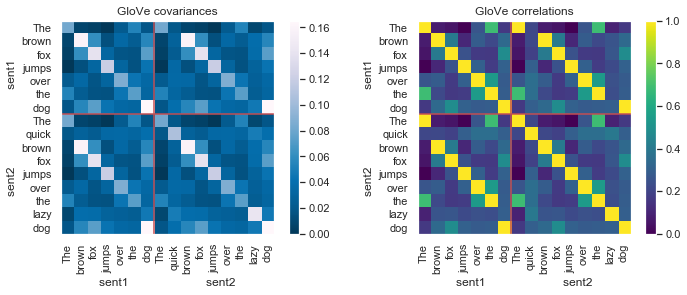

In [5]:
from utils import getCor

plt.figure(figsize=(10, 4))

plt.subplot(121)
ax = plt.gca()
plt.imshow(embedcov, cmap='PuBu_r')
span = np.linspace(-.5, 15.5)
plt.plot(span, [6.5]*len(span), 'r')
plt.plot([6.5]*len(span), span, 'r')
plt.yticks(np.arange(16), sent1+sent2)
plt.xticks(np.arange(16), sent1+sent2, rotation=90)
plt.title('GloVe covariances')
plt.xlabel('sent1                       sent2')
plt.ylabel('sent2                       sent1')
plt.colorbar()
plt.grid()

plt.subplot(122)
ax = plt.gca()
plt.imshow(getCor(embedcov), cmap='viridis')
span = np.linspace(-.5, 15.5)
plt.plot(span, [6.5]*len(span), 'r')
plt.plot([6.5]*len(span), span, 'r')
plt.yticks(np.arange(16), sent1+sent2)
plt.xticks(np.arange(16), sent1+sent2, rotation=90)
plt.title('GloVe correlations')
plt.xlabel('sent1                       sent2')
plt.ylabel('sent2                       sent1')
plt.colorbar()
plt.grid()

plt.tight_layout()

In [6]:
with open('ExampleGloVeVecs.npy', 'wb') as f:
    np.save(f, embedarr)
with open('ExampleGloVeCov.npy', 'wb') as f:
    np.save(f, embedcov)